# Plot case solved odds ratios

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Change working directory to allow relative imports
%cd /re_gecip/enhanced_interpretation/AlexBlakes/nmd_dnms

/nas/weka.gel.zone/re_gecip/enhanced_interpretation/AlexBlakes/nmd_dnms


In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src import constants as C
from src import visualisation as vis

In [4]:
# Plotting and colours
plt.style.use(C.STYLE_DEFAULT)
plt.style.use(C.COLOR_REGIONS)

_PALETTE = vis.color_palette("regions")

In [5]:
or_stats = pd.read_csv("data/statistics/case_solved_odds_ratios.tsv", sep="\t")

In [6]:
df0 = or_stats[or_stats["region"] == "Whole transcript"]
df1 = or_stats[or_stats["region"] == "NMD target"]
df2 = or_stats[or_stats["region"] == "Start proximal"]
df3 = or_stats[or_stats["region"] == "Long exon"]
df4 = or_stats[or_stats["region"] == "Distal"]

In [28]:
def plot_odds_ratios(
    df,
    ax,
    facecolor="white",
    label=None,
    xticks=False,
    legend=False,
    **kwargs
):

    y = np.arange(len(df))[::-1]
    colors = {
        "unconstrained": "grey",
        "constrained": "black",
    }

    for i, constraint in enumerate(df["constraint"]):
        ax.errorbar(
            x=[df.iloc[i]["odds_ratio"]],
            y=[(len(df) - 1) - i],
            fmt="o",
            markersize=4,
            color=colors[constraint],
            xerr=(
                [abs(df.iloc[i]["ci_lo"] - df.iloc[i]["odds_ratio"])],
                [abs(df.iloc[i]["ci_hi"] - df.iloc[i]["odds_ratio"])],
            ),
            label=constraint.capitalize()
        )
        
    if legend:
        ax.legend(loc="center right",)

    ax.axvline(x=1, c="grey", linestyle="--")

    ax.set_xlabel("Odds ratio\n(case solved)")
    ax.set_ylim(y.min() - 1, y.max() + 1)
    ax.set_xlim(-1, 14)
    ax.set_yticks(ticks=[y.max()/2], labels=[label])
    ax.tick_params(axis="y", length=0)
    # ax.label_outer(remove_inner_ticks=True)

    ax.set_facecolor(facecolor)
    ax.patch.set_alpha(0.3)

    ax.spines["left"].set_visible(False)
    ax.spines["left"].set_position(("outward", 7))

    if not xticks:
        ax.spines["bottom"].set_visible(False)
        ax.tick_params(axis="x", bottom=False)
        ax.set_xlabel(None)

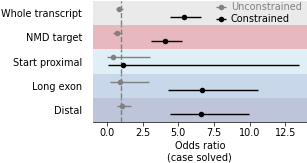

In [29]:
fig, axs = plt.subplots(5, 1, figsize=(7 * C.CM, 4 * C.CM), sharex=True)
plt.subplots_adjust(hspace=0)

plot_odds_ratios(
    df0,
    axs[0],
    label="Whole transcript",
    facecolor=_PALETTE[0], legend=True
)
plot_odds_ratios(
    df1,
    axs[1],
    label="NMD target",
    facecolor=_PALETTE[1],
)
plot_odds_ratios(df2, axs[2], label="Start proximal", facecolor=_PALETTE[2])
plot_odds_ratios(df3, axs[3], label="Long exon", facecolor=_PALETTE[3])
plot_odds_ratios(df4, axs[4], label="Distal", facecolor=_PALETTE[4], xticks=True)

plt.savefig("data/plots/case_solved_odds_ratios.svg")
plt.savefig("data/plots/case_solved_odds_ratios.png", dpi=1000)